In [ ]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import model_selection, metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy
from statsmodels.graphics.gofplots import qqplot
from collections import Counter

from kmodes.kprototypes import KPrototypes
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.utils import shuffle

from tabulate import tabulate

In [ ]:
df = pd.read_csv("df_cleaned.csv", encoding= "unicode_escape")
df.head()

,age,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,avg_balance_last_12months,...,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag,location_encoded,occupation_encoded,days_since_recent_trade,time_between_account_open_and_trade,credit_history_length
0,56,40099,424.000000,108,1,10,3.139572,0,18209.383136,4324.930673,...,1,1,0,0,1,0.254848,0.256207,268,119,2004
1,69,2050,483.000000,0,0,1,1.017489,0,33673.696504,21726.593916,...,0,1,0,0,0,0.285933,0.266010,307,504,326
2,46,71936,566.000000,0,0,1,1.508626,0,101918.174202,63930.102255,...,0,0,0,0,0,0.264368,0.266010,58,1544,160
3,32,15833,491.513037,97,1,5,2.995150,0,9055.101659,3033.403742,...,0,1,1,0,0,0.241167,0.266965,47,62,396
4,60,8574,787.000000,0,0,1,1.182380,0,91682.852040,77457.387016,...,1,0,1,0,0,0.241167,0.221757,89,37,664


In [ ]:
for index, column in enumerate(df.columns):
  print(f"{index}, {column}")

0, age
1, income_level
2, fico_score
3, delinquency_status
4, charge_off_status
5, number_of_credit_applications
6, debt_to_income_ratio
7, payment_methods_high_risk
8, max_balance
9, avg_balance_last_12months
10, number_of_delinquent_accounts
11, number_of_defaulted_accounts
12, new_accounts_opened_last_12months
13, multiple_applications_short_time_period
14, unusual_submission_pattern
15, applications_submitted_during_odd_hours
16, watchlist_blacklist_flag
17, public_records_flag
18, location_encoded
19, occupation_encoded
20, days_since_recent_trade
21, time_between_account_open_and_trade
22, credit_history_length


In [ ]:
df_backup=df.copy()

In [ ]:
categorical_cols = [7,13,14,15,16,17,18,19]
categorical_data = df_backup.iloc[:, categorical_cols]
numerical_cols = [0,1,2,3,5,6,8,9,10,11,12,20,21,22]
numerical_data = df_backup.iloc[:, numerical_cols]

In [ ]:
X = df.drop("charge_off_status", axis=1)
y = df["charge_off_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

## Kprototype

Completed for k=2
Completed for k=3
Completed for k=4
Completed for k=5
Completed for k=6
Completed for k=7
Completed for k=8
Completed for k=9
Completed for k=10


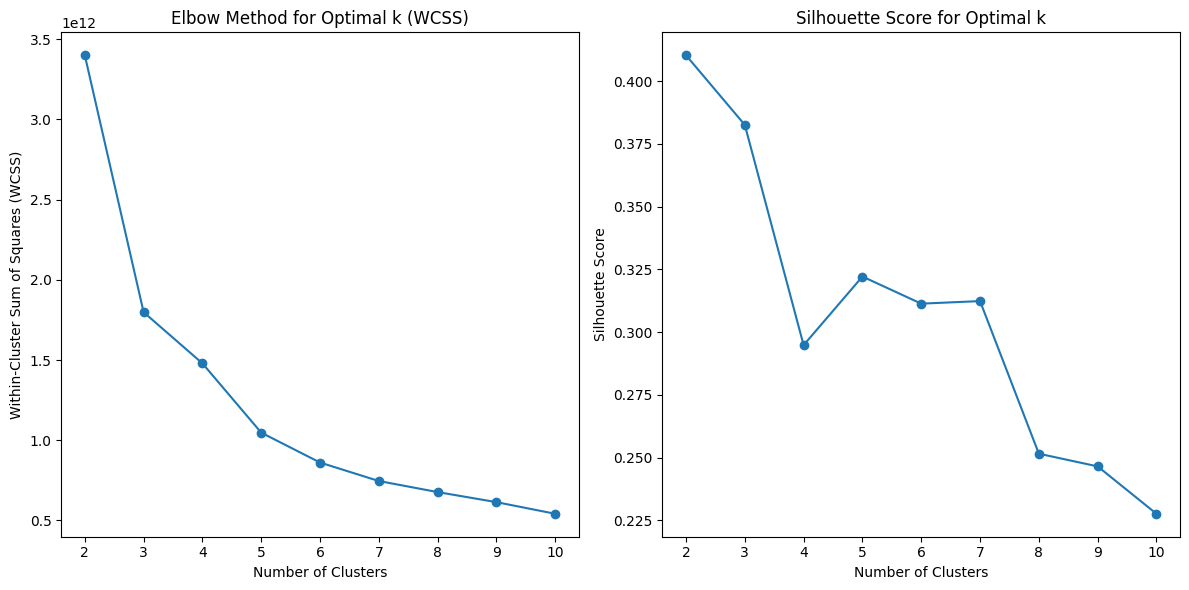

In [ ]:
wcss = []
silhouette_scores = []

for k in range(2, 11):
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=1, verbose=0, random_state=32)
    clusters = kproto.fit_predict(X_train, categorical=categorical_cols)
    wcss.append(kproto.cost_)
    silhouette_score_val = silhouette_score(X_train, clusters)
    silhouette_scores.append(silhouette_score_val)
    print(f"Completed for k={k}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (WCSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
n_clusters = 3 #optimal number of clusters
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=1, verbose=2)
#fit model to data
clusters = kproto.fit_predict(X_train, categorical=categorical_cols)

#print cluster centroids and labels
print("Cluster Centroids:")
print(kproto.cluster_centroids_)
print("\nCluster Labels:")
print(kproto.labels_)

cluster_counts = np.bincount(clusters)

#counts of observations in each cluster
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} observations")

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 527, ncost: 1850370912109.64
Run: 1, iteration: 2/100, moves: 302, ncost: 1806541906133.2205
Run: 1, iteration: 3/100, moves: 120, ncost: 1800228678876.7134
Run: 1, iteration: 4/100, moves: 47, ncost: 1798633504020.6355
Run: 1, iteration: 5/100, moves: 21, ncost: 1798399107956.079
Run: 1, iteration: 6/100, moves: 3, ncost: 1798395355265.4062
Run: 1, iteration: 7/100, moves: 0, ncost: 1798395355265.4062
Cluster Centroids:
[[4.65725748e+01 5.63162071e+04 6.17992603e+02 2.53698031e+01
  1.85047411e+00 1.46476085e+00 2.45805981e-01 3.06725858e+04
  6.17992603e+02 4.92341357e-01 1.36688549e+00 2.49452954e-01
  7.33237053e+02 1.67093946e+03 1.12907659e+03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.46537396e-01
  2.56206554e-01 2.68000000e+02]
 [4.58909953e+01 1.49545113e+04 6.66220124e

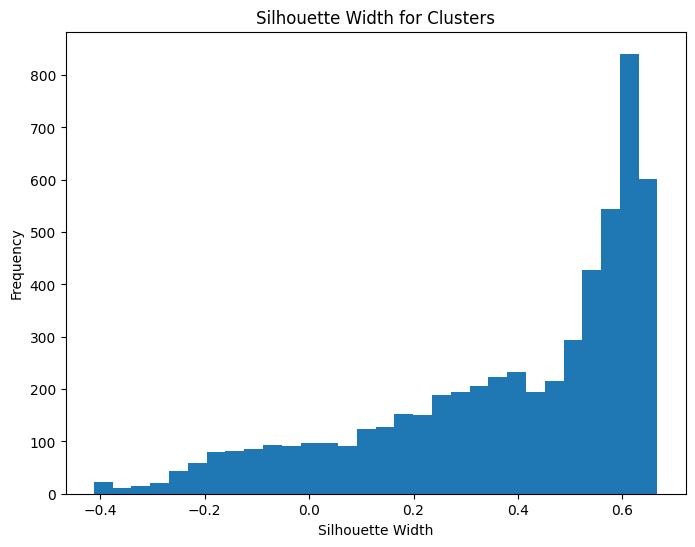

In [ ]:
silhouette_vals = silhouette_samples(X_train, clusters)

#plot silhouette width for each sample
plt.figure(figsize=(8, 6))
plt.hist(silhouette_vals, bins=30)
plt.title('Silhouette Width for Clusters')
plt.xlabel('Silhouette Width')
plt.ylabel('Frequency')
plt.show()

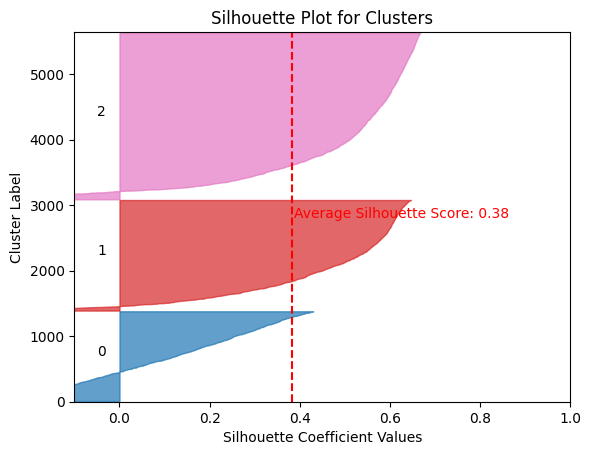

In [ ]:
np.random.seed(32)

def plot_silhouette(X, clusters):
    silhouette_vals = silhouette_samples(X, clusters)
    n_clusters = len(np.unique(clusters))
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[clusters == i]
        cluster_silhouette_vals.sort()

        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab10(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    silhouette_avg = silhouette_score(X, clusters)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    ax.text(silhouette_avg + 0.005, 0.5 * len(X), 'Average Silhouette Score: {:.2f}'.format(silhouette_avg), color="red")
    ax.set_title("Silhouette Plot for Clusters")

    plt.show()

plot_silhouette(X_train, clusters)

## Kmedioids

Completed for k=2
Completed for k=3
Completed for k=4
Completed for k=5
Completed for k=6
Completed for k=7
Completed for k=8
Completed for k=9
Completed for k=10


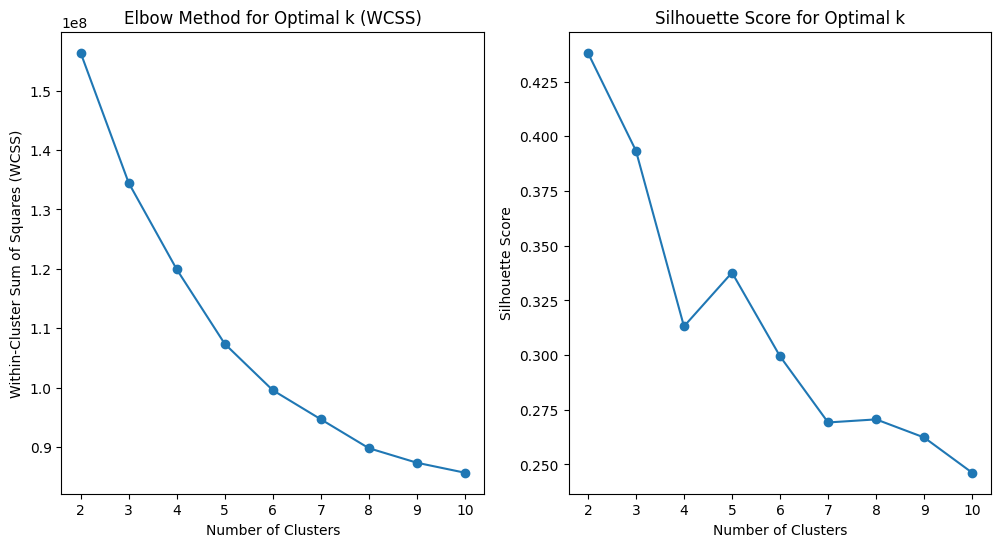

In [ ]:
np.random.seed(32)

wcss = []
silhouette_scores = []

for k in range(2, 11):
    kmedoids = KMedoids(n_clusters=k, init='random', random_state=32)
    clusters = kmedoids.fit_predict(X_train)

    wcss.append(kmedoids.inertia_)

    silhouette_avg = silhouette_score(X_train, clusters)
    silhouette_scores.append(silhouette_avg)

    print(f"Completed for k={k}")

#elbow curve for WCSS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (WCSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()

In [ ]:
np.random.seed(32)
n_clusters = 3

kmedoids = KMedoids(n_clusters=n_clusters, init='random', random_state=28)
clusters = kmedoids.fit_predict(X_train)
print("Cluster Medoids (Representative Points):")
print(kmedoids.cluster_centers_)
print("\nCluster Labels:")
print(clusters)

cluster_counts = np.bincount(clusters)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} observations")

Cluster Medoids (Representative Points):
[[5.50000000e+01 2.20540000e+04 7.22000000e+02 0.00000000e+00
  1.00000000e+00 1.29444884e+00 0.00000000e+00 8.11487449e+04
  6.16666105e+04 7.22000000e+02 0.00000000e+00 3.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 2.57703081e-01 2.69447576e-01 3.24000000e+02
  9.83000000e+02 1.16500000e+03]
 [4.80000000e+01 1.47120000e+04 6.42000000e+02 0.00000000e+00
  1.00000000e+00 1.65532733e+00 1.00000000e+00 4.83121600e+04
  3.37604027e+04 6.42000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.57703081e-01 2.31382979e-01 2.92000000e+02
  1.25800000e+03 1.47100000e+03]
 [4.70000000e+01 2.01500000e+04 6.01000000e+02 0.00000000e+00
  1.00000000e+00 1.29667443e+00 0.00000000e+00 2.12606468e+04
  1.32695212e+04 6.01000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.643678

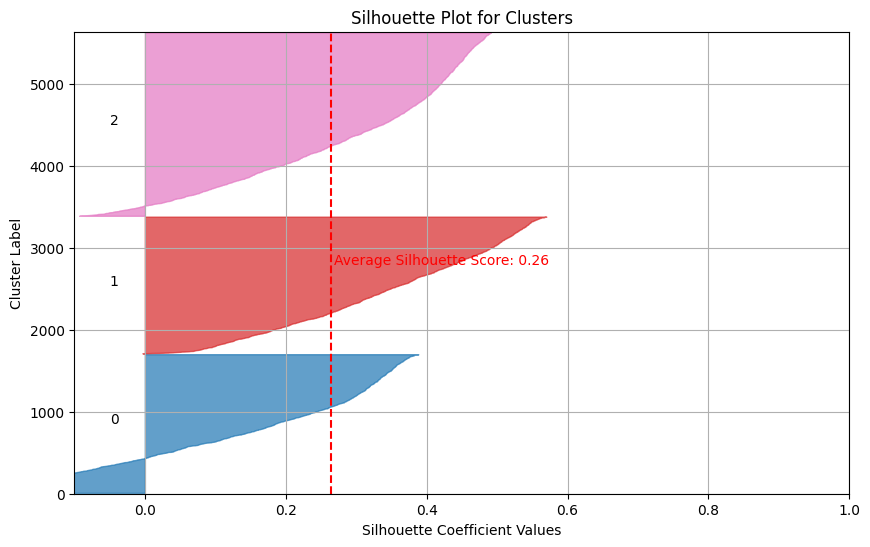

In [ ]:
np.random.seed(32)

def plot_silhouette(X, clusters):
    silhouette_vals = silhouette_samples(X, clusters)
    n_clusters = len(np.unique(clusters))

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[clusters == i]
        cluster_silhouette_vals.sort()

        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab10(float(i) / n_clusters)  #coluormap for clusters
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    silhouette_avg = silhouette_score(X, clusters)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    ax.text(silhouette_avg + 0.005, 0.5 * len(X), 'Average Silhouette Score: {:.2f}'.format(silhouette_avg), color="red")
    ax.set_title("Silhouette Plot for Clusters")
    ax.grid(True)
    plt.show()

plot_silhouette(X_train, clusters)

## Kmeans

In [ ]:
for index, column in enumerate(X_train.columns):
  print(f"{index}, {column}")

0, age
1, income_level
2, fico_score
3, delinquency_status
4, number_of_credit_applications
5, debt_to_income_ratio
6, payment_methods_high_risk
7, max_balance
8, avg_balance_last_12months
9, number_of_delinquent_accounts
10, number_of_defaulted_accounts
11, new_accounts_opened_last_12months
12, multiple_applications_short_time_period
13, unusual_submission_pattern
14, applications_submitted_during_odd_hours
15, watchlist_blacklist_flag
16, public_records_flag
17, location_encoded
18, occupation_encoded
19, days_since_recent_trade
20, time_between_account_open_and_trade
21, credit_history_length


In [ ]:
#numerical columns in X_train
num_in_X_train = X_train.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,19,20,21]]

Completed for k=2
Completed for k=3
Completed for k=4
Completed for k=5
Completed for k=6
Completed for k=7
Completed for k=8
Completed for k=9
Completed for k=10


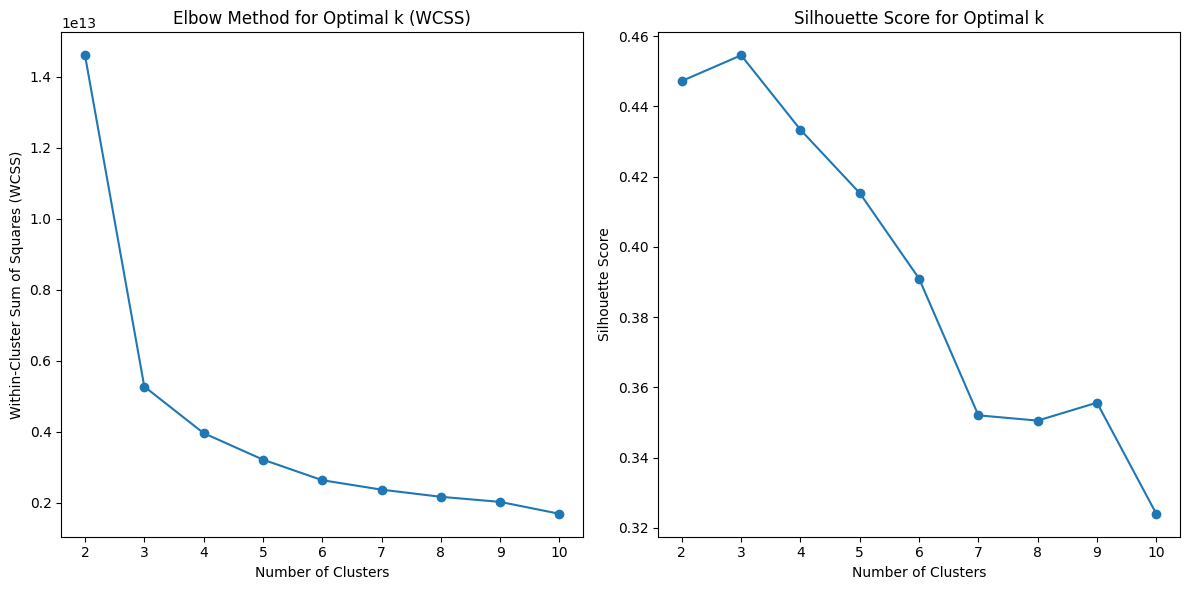

In [ ]:
np.random.seed(32)

wcss = []
silhouette_scores = []

#iterate over different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=32)
    clusters = kmeans.fit_predict(num_in_X_train)

    #WCSS for each k
    wcss.append(kmeans.inertia_)

    #silhouette score for each k
    silhouette_avg = silhouette_score(X_train, clusters)
    silhouette_scores.append(silhouette_avg)

    print(f"Completed for k={k}")

#elbow curve for WCSS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (WCSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

#plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(32)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=32)
clusters = kmeans.fit_predict(X_train)

print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)
print("\nCluster Labels:")
print(clusters)

cluster_counts = np.bincount(clusters)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} observations")

Cluster Centers (Centroids):
[[4.62832870e+01 2.33210392e+04 5.80681456e+02 4.19672536e+01
  2.40160643e+00 1.59624263e+00 3.27772629e-01 2.82280282e+04
  1.78657145e+04 5.80681456e+02 7.22891566e-01 1.72814334e+00
  3.39511894e-01 4.13036762e-01 3.72258264e-01 1.37781897e-01
  2.14087118e-01 2.60994229e-01 2.61305733e-01 2.17802595e+02
  7.35294099e+02 1.61929873e+03]
 [4.61510239e+01 2.43574416e+04 6.65065883e+02 2.34257679e+00
  1.02815700e+00 1.30344942e+00 1.04948805e-01 7.49549944e+04
  5.51457223e+04 6.65065883e+02 2.02645051e-01 9.13822526e-01
  1.45904437e-01 1.74914676e-01 2.25682594e-01 1.07081911e-01
  1.82167235e-01 2.60934784e-01 2.60703665e-01 2.18667662e+02
  7.29414249e+02 1.65655759e+03]
 [4.23157895e+01 2.88789474e+04 5.76368421e+02 3.51052632e+01
  2.36842105e+00 1.28463842e+00 4.73684211e-01 7.79411471e+05
  3.10833594e+04 5.76368421e+02 6.31578947e-01 1.68421053e+00
  1.57894737e-01 3.15789474e-01 3.68421053e-01 1.05263158e-01
  1.05263158e-01 2.56873997e-01 2.595

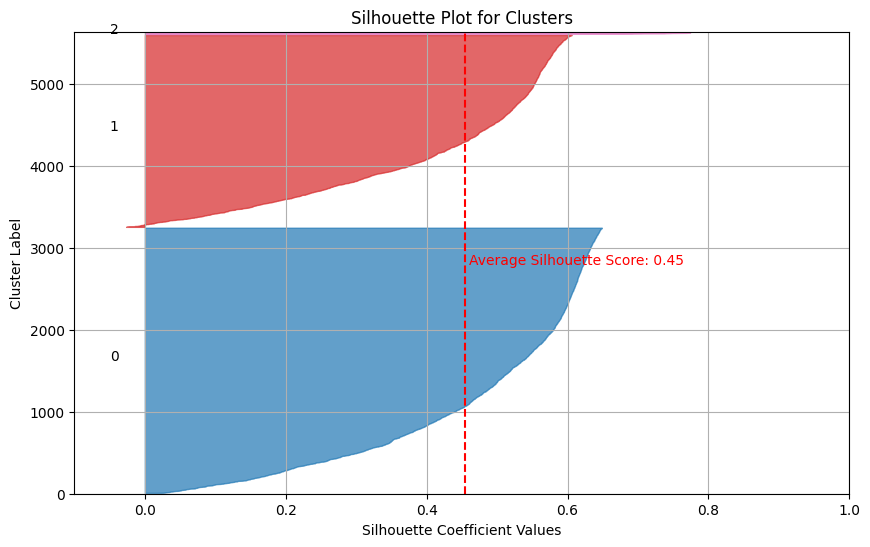

In [ ]:
np.random.seed(32)

#optimal number of clusters
n_clusters = 3

#initialize and fit KMeans
kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=32)
clusters = kmeans.fit_predict(X_train)

def plot_silhouette(X, clusters):
    silhouette_vals = silhouette_samples(X, clusters)
    n_clusters = len(np.unique(clusters))

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[clusters == i]
        cluster_silhouette_vals.sort()

        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab10(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    silhouette_avg = silhouette_score(X, clusters)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    ax.text(silhouette_avg + 0.005, 0.5 * len(X), 'Average Silhouette Score: {:.2f}'.format(silhouette_avg), color="red")
    ax.set_title("Silhouette Plot for Clusters")
    ax.grid(True)
    plt.show()

plot_silhouette(X_train, clusters)